## Problem 0
Critique the most important figure from a seminal paper in your field. 

Some background information about this paper. This paper is authored by Benjamin Bloom of the University of Chicago and was published in 1984. This paper is about the differences in student performance based on their "learning environment". The reason this paper is famous is because it concludes that students who get 1-on-1 tutoring score 2 sigma above students who get the conventional instruction. This 2 sigma difference is now the golden bench mark for automated tutoring systems. <a href="https://en.wikipedia.org/wiki/Bloom%27s_2_Sigma_Problem">Link to summary here</a>

<img src="data/original_figure.png" width=50%>

It is not clear how this figure was created since it looks to be hand drawn, which makes me suspciious of the data it is based on. I'm not sure when hand drawn figures became a no-no, but I will assume that this figure is actually representative of Bloom's actual data. 

I think the figure needs a lot of work, mainly the axis need to be labeled and some tick marks might be nice.

The figure is pretty minimal as it is, so I dont think removing something would allow you to convey the same message.

## Problem 1

This figure is not published yet, but hopefully it will be in a paper within the next month. 

<img src="data/score_time_series-add_up.png" width=70%>

In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
raw = pd.read_csv('data/add_up-scores.csv')
raw.dropna(inplace=True)
treatment = raw[raw['treatment']==1].drop('treatment',axis=1)
control = raw[raw['treatment']==0].drop('treatment',axis=1)

In [4]:
xspace = np.linspace(0,1,100)

In [5]:
TOOLS = 'pan,box_zoom,box_select,crosshair,resize,reset,hover'
output_notebook()
p = figure(width=800, height=400,tools=TOOLS)


alpha=0.4
treat_mean = np.zeros(len(xspace))
ctrl_mean = np.zeros(len(xspace))
for i,row in treatment.iterrows():
    scores = row.values[1:]
    scores = scores.astype(float)
    treat_mean += scores/len(treatment)
    p.line(xspace,scores,line_width=1,color='navy',alpha=alpha)
for i,row in control.iterrows():
    scores = row.values[1:]
    scores = scores.astype(float)
    ctrl_mean = ctrl_mean + scores/len(control)
    p.line(xspace,scores,line_width=1,color='red',alpha=alpha)
    
p.line(xspace,treat_mean,line_width=3.,color='navy',alpha=1,legend='Treatment')
p.line(xspace,ctrl_mean,line_width=3.,color='red',alpha=1,legend='Control')


p.line(xspace,9*np.ones(len(xspace)), line_width=2., line_dash='dashed',legend='Threshold')
p.line(xspace,4.6*np.ones(len(xspace)), line_width=2., line_dash='dashed',color='red',legend='Instructor')
    

show(p)

Loading BokehJS ...

The bokeh plot is an aestetic improvement over the older one and the interactivity, especially the hover tool helps gain a better understanding of the data. I will most likely end up using bokeh for data exploration and maybe for building data dashboards.

## Problem 2
Reproduce `stocks.png`
<img src='data/stocks.png' width=40%>

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
yahoo = np.genfromtxt('data/yahoo_data.txt',delimiter='\t',names=True)
google = np.genfromtxt('data/google_data.txt',delimiter='\t',names=True)
nytemp = np.genfromtxt('data/ny_temps.txt',delimiter='\t',names=True)

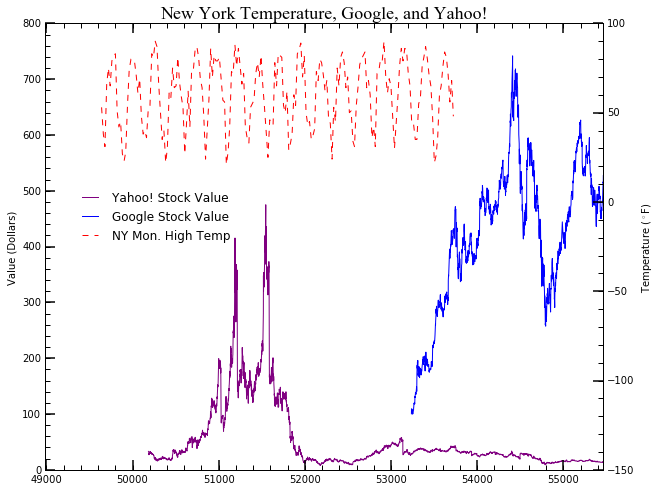

In [9]:
fig,ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
#ax1.set_title('New York Temperature, Google, and Yahoo!',weight='bold',fontsize=16)
ax1.set_title('New York Temperature, Google, and Yahoo!',fontname="Times New Roman",weight='bold',fontsize=18)
ly = ax1.plot(yahoo['Modified_Julian_Date'],yahoo['Stock_Value'],color='purple',label='Yahoo! Stock Value')
lg = ax1.plot(google['Modified_Julian_Date'],google['Stock_Value'],color='blue',label='Google Stock Value')
ax1.set_ylabel('Value (Dollars)', color='k',fontsize='medium')
xticks_minor = np.arange(48000, 58000,200)
xticks_major = np.arange(48000, 58000,1000)
yticks = np.arange(0,800,20)
ax1.set_xticks(xticks_major)
ax1.set_xticks(xticks_minor,minor=True)
ax1.set_yticks(yticks,minor=True)
ax1.tick_params('both', length=10, width=1.5, which='major')
ax1.tick_params('both', length=5, width=1, which='minor')



ax2 = ax1.twinx()
ax2.set_ylabel('Temperature ($^\circ$F)', color='k',fontsize='medium')
ax2.set_ylim(-150,100)
lt = ax2.plot(nytemp['Modified_Julian_Date'],nytemp['Max_Temperature'],color='red',linestyle='--',label='NY Mon. High Temp')
ax2.set_xticks(xticks_major)
ax2.set_xticks(xticks_minor,minor=True)
ax2.tick_params('both', length=10, width=1.5, which='major')
ax2.tick_params('both', length=5, width=1, which='minor')

yticks = np.arange(-150,100,10)
ax2.set_yticks(yticks,minor=True)


lns = ly+lg+lt
lbs = [l.get_label() for l in lns]
ax1.legend(lns,lbs,loc=(0.05,0.5),framealpha=0)
plt.savefig('data/recreated_stocks.png')
plt.show()

## Problem 3
Create a brushing class

In [26]:
import mpld3
from mpld3 import plugins, utils
import matplotlib.pyplot as plt

mpld3.enable_notebook()
%matplotlib inline
#for testing
from sklearn.datasets import load_iris

In [27]:
data = load_iris()
X = data.data
y = data.target
X += 0.1*np.random.random(X.shape)

In [62]:
class BrushingPlot(object):
    def __init__(self):
        pass
    def set_data(self,data):
        self.data = data
        self.n_samples, self.n_features = data.shape
    def brush(self):
        fig, ax = plt.subplots(self.n_features, self.n_features, figsize=(10, 10))
        for i in range(self.n_features):
            for j in range(self.n_features):
                scat = ax[self.n_features-(1+i), j].scatter(self.data[:, j], self.data[:, i],
                                      c=np.arange(self.n_samples), s=40, alpha=0.6)
                
                ax[self.n_features-(1+i), j].xaxis.set_major_formatter(plt.NullFormatter())
                ax[self.n_features-(1+i), j].yaxis.set_major_formatter(plt.NullFormatter())
                
                xmin,xmax = 0.8*np.min(self.data[:, j]), 1.2*np.max(self.data[:, j]) 
                ymin,ymax = 0.8*np.min(self.data[:, i]), 1.2*np.max(self.data[:, i]) 

                ax[self.n_features-(1+i), j].set_xlim(xmin,xmax)
                ax[self.n_features-(1+i), j].set_ylim(ymin,ymax)
                

        plugins.connect(fig, plugins.Reset(), plugins.LinkedBrush(scat))
        mpld3.enable_notebook()

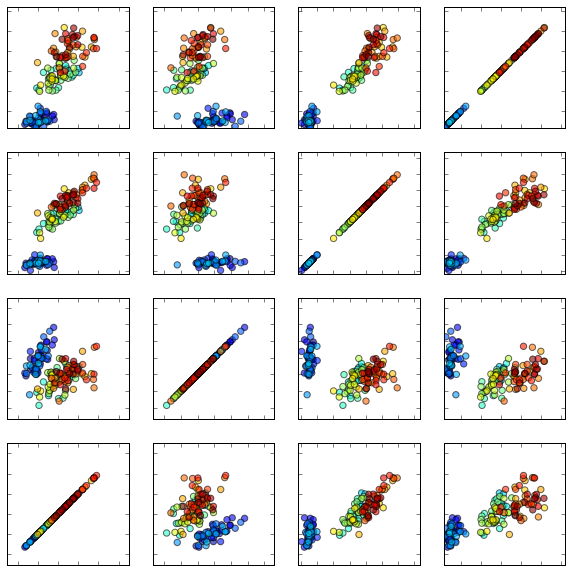

In [63]:
BP = BrushingPlot()
BP.set_data(X)
BP.brush()